In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('player10_results.csv')
df = df[['epsilon','tokens','score','optimal_value','optimal_policy']]
df_501 = df.loc[df.score==501]

In [29]:
token_dfs = []

for token in range(10):
    
    temp = df_501.loc[df_501.tokens==token].set_index('epsilon')['optimal_value'].copy()
    token_dfs.append(temp)

## Breakeven Point between Tokens and Epsilon 

TODO: Run with more epsilos (3,5,6,7,8,9,10)

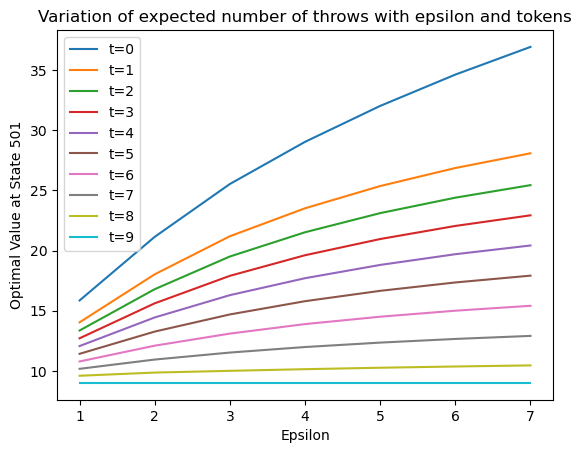

In [30]:
t_leg = []

for token in range(10):
    t_leg.append('t={}'.format(token))
    fig = plt.plot(token_dfs[token])

fig = plt.title('Variation of expected number of throws with epsilon and tokens')
fig = plt.xlabel('Epsilon')
fig = plt.ylabel('Optimal Value at State 501')
fig = plt.legend(t_leg)


In [35]:
import init_simple_mdp as imdp

df['policy_is_token'] = df['optimal_policy'] > imdp.throw_num

In [37]:
epsilon_dfs = []

for epsilon in range(7):
    
    temp = df.loc[df.epsilon==epsilon].set_index('epsilon')['optimal_value'].copy()
    token_dfs.append(temp)


,epsilon,tokens,score,optimal_value,optimal_policy,policy_is_token
0,1,0,0,0.000000,-1,False
1,1,0,1,0.000000,-1,False
2,1,0,2,2.887532,55,False
3,1,0,3,3.897533,40,False
4,1,0,4,2.329057,295,False
...,...,...,...,...,...,...
5015,1,9,497,9.000000,750,True
5016,1,9,498,9.000000,750,True
5017,1,9,499,9.000000,750,True
5018,1,9,500,9.000000,750,True


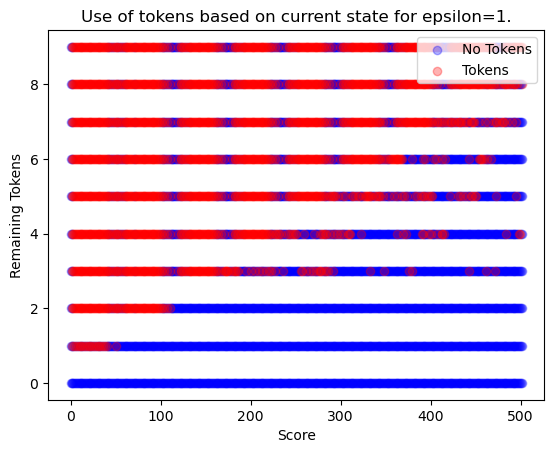

In [63]:
epsilon = 1
temp_tokens = df.loc[df.epsilon==epsilon].loc[df.policy_is_token==True][['score','tokens']]
temp_notokens = df.loc[df.epsilon==epsilon].loc[df.policy_is_token==False][['score','tokens']]
fig = plt.scatter(temp_notokens.score,temp_notokens.tokens,alpha=0.3,color='blue')
fig = plt.scatter(temp_tokens.score,temp_tokens.tokens,alpha=0.3,color='red')
fig = plt.legend(['No Tokens', 'Tokens'])
fig = plt.xlabel('Score')
fig = plt.ylabel('Remaining Tokens')
fig = plt.title('Use of tokens based on current state for epsilon={}.'.format(epsilon))

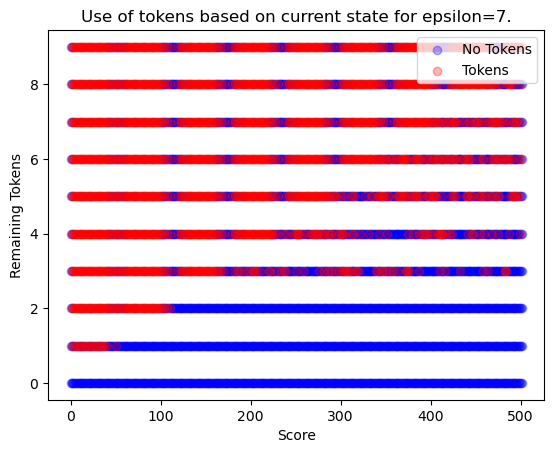

In [65]:
epsilon = 7
temp_tokens = df.loc[df.epsilon==epsilon].loc[df.policy_is_token==True][['score','tokens']]
temp_notokens = df.loc[df.epsilon==epsilon].loc[df.policy_is_token==False][['score','tokens']]
fig = plt.scatter(temp_notokens.score,temp_notokens.tokens,alpha=0.3,color='blue')
fig = plt.scatter(temp_tokens.score,temp_tokens.tokens,alpha=0.3,color='red')
fig = plt.legend(['No Tokens', 'Tokens'])
fig = plt.xlabel('Score')
fig = plt.ylabel('Remaining Tokens')
fig = plt.title('Use of tokens based on current state for epsilon={}.'.format(epsilon))